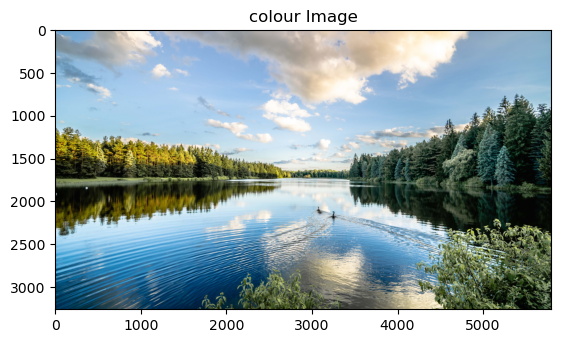

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'Image_1.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('colour Image')
plt.show()

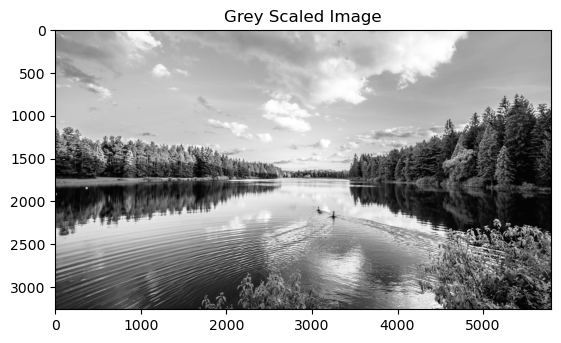

In [15]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Grey Scaled Image')
plt.show()

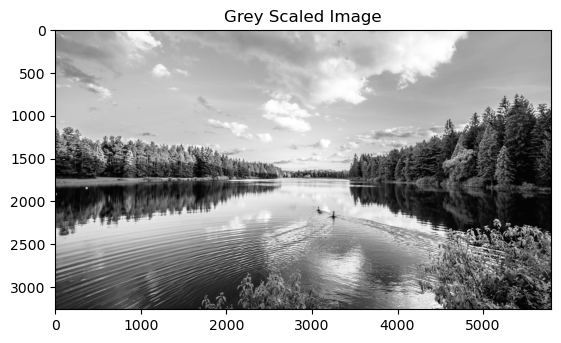

In [16]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Grey Scaled Image')
plt.savefig('grey_scale.jpeg')
plt.show()

In [18]:
print(image.shape)

(3261, 5797)


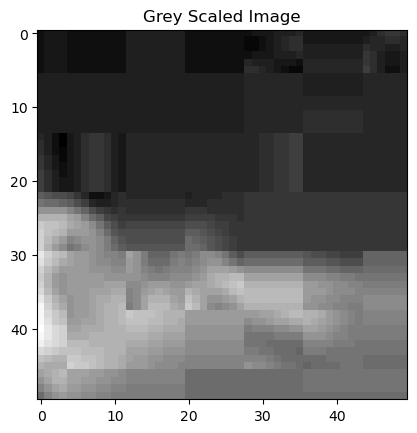

In [19]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = image[50:100,100:150]
plt.imshow(image, cmap='gray')
plt.title('Grey Scaled Image')
plt.show()

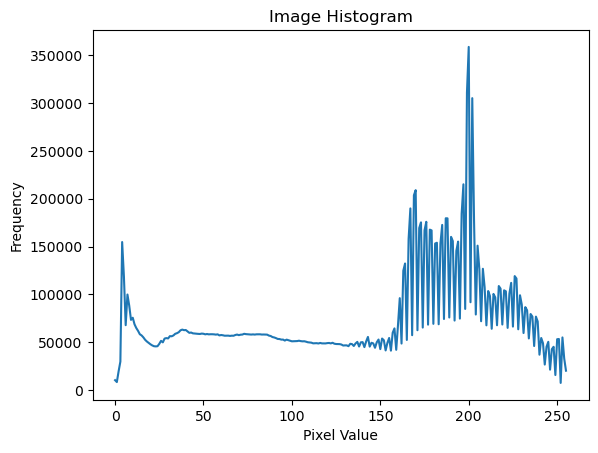

In [20]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
import keras
from tensorflow.keras.utils import load_img

img = load_img(image_path)

print(type(img))
print(img.format)
print(img.mode)
print(img.size)

img.show()


<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(5797, 3261)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


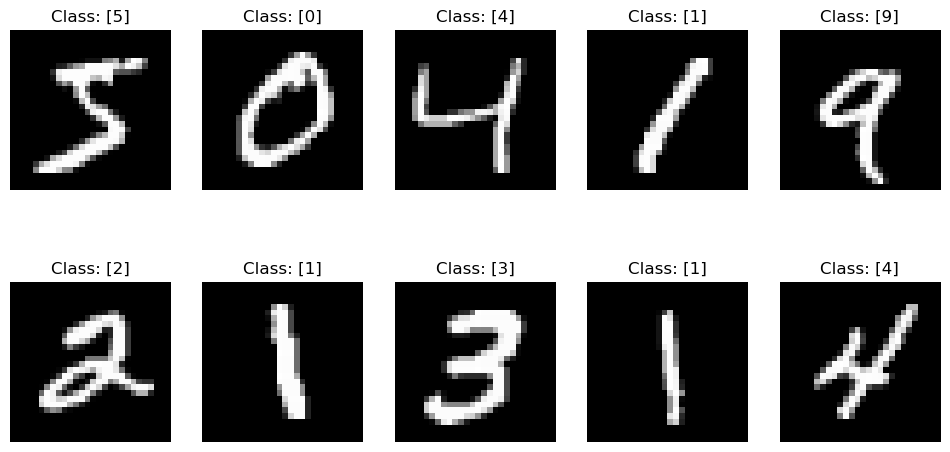

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float64') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64') / 255.0

num_rows, num_cols = 2, 5
plt.figure(figsize=(12, 6))

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Class: {[y_train[i]]}')
    plt.axis('off')

plt.show()

In [23]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test,y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

C:\Users\bi49hm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8570 - loss: 0.4515 - val_accuracy: 0.9843 - val_loss: 0.0481
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9884 - val_loss: 0.0335
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9888 - loss: 0.0360 - val_accuracy: 0.9919 - val_loss: 0.0271
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9918 - val_loss: 0.0291
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9918 - val_loss: 0.0253
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9897 - loss: 0.0310
Test Accuracy: 99.18%


In [25]:
predictions = model.predict(X_test)

correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test,axis=1))[0]

incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


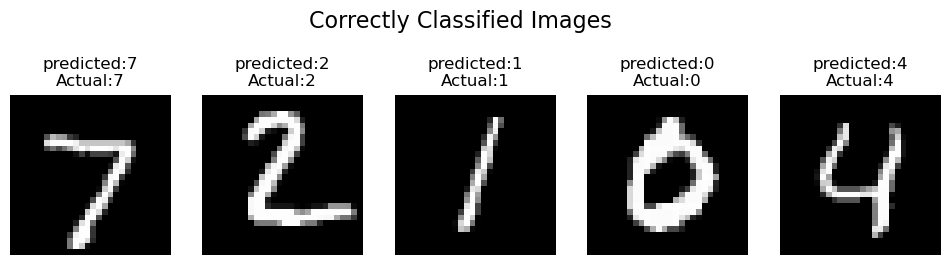

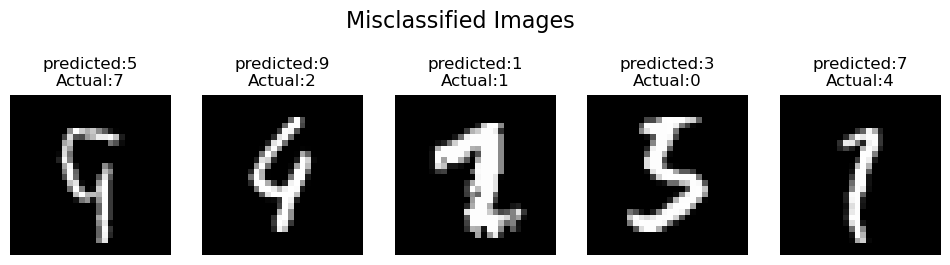

In [27]:
plt.figure(figsize=(12,6))
plt.suptitle('Correctly Classified Images', fontsize=16)

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[correct_indices[i]].reshape(28,28),cmap='gray')
    plt.title(f'predicted:{np.argmax(predictions[correct_indices[i]])}\nActual:{np.argmax(y_test[correct_indices[i]])}')
    plt.axis('off')

plt.figure(figsize=(12,6))
plt.suptitle('Misclassified Images',fontsize=16)

for i in range(5):
    plt.subplot(2,5,i + 1)
    plt.imshow(X_test[incorrect_indices[i]].reshape(28,28),cmap='gray')
    plt.title(f'predicted:{np.argmax(predictions[incorrect_indices[i]])}\nActual:{np.argmax(y_test[correct_indices[i]])}')
    plt.axis('off')

plt.show()
